# Deep Learning {-}

This repository aims at familiarizing with training and testing a Deep Neural Network (DNN).

- Load the data.
- Process and normalize the images.
- Build, train and test the two following Deep Neural Networks:
 - First network: must at least consist of three (03) Convolutional layers, two (02) Fully Connected layers, two (02) Pooling layers.
 - Second network: has at most 4M (four millions) parameters (use model.summary() to check). The architecture is of your choice.
- Evaluate the model performance on the test set.

The dataset will be working on is cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)



**1. Load the data**

In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

In [ ]:
# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


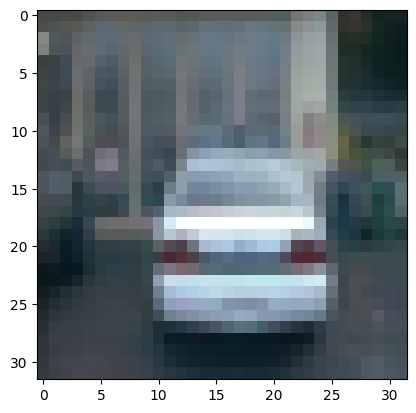

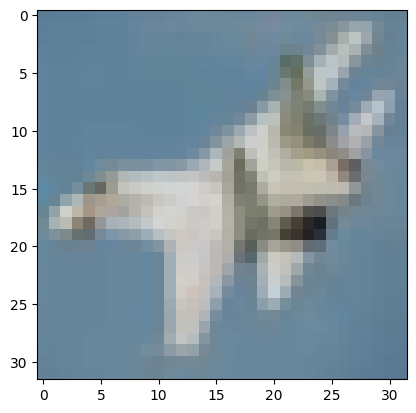

In [ ]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

**2. Process and normalize the images**

Label: [0]
Pixel values: [[[255 255 255]
  [252 254 255]
  [231 234 235]
  ...
  [189 200 204]
  [187 198 202]
  [186 197 201]]

 [[255 255 255]
  [249 251 252]
  [217 221 223]
  ...
  [187 198 202]
  [185 196 200]
  [184 194 199]]

 [[255 255 255]
  [240 242 244]
  [190 193 197]
  ...
  [186 197 201]
  [184 195 199]
  [184 193 198]]

 ...

 [[132 131 126]
  [136 135 130]
  [144 143 138]
  ...
  [132 132 122]
  [131 131 121]
  [123 120 114]]

 [[129 128 122]
  [132 131 126]
  [139 138 133]
  ...
  [137 137 126]
  [133 133 123]
  [124 122 116]]

 [[131 128 123]
  [133 131 126]
  [140 137 132]
  ...
  [135 133 124]
  [139 137 130]
  [132 131 125]]]


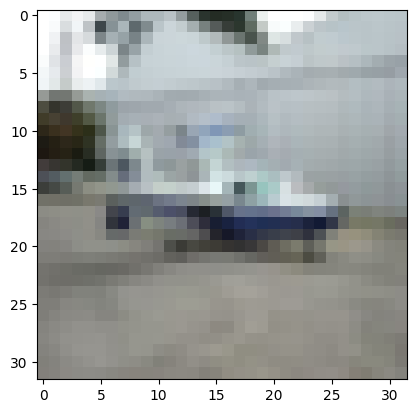

In [ ]:
# Show label and pixel values of an image
print("Label:", y_train[0])
print("Pixel values:", X_train[0])

# Show the image
imgplot = plt.imshow(X_train[0], cmap='gray')
plt.show()

In [ ]:
# Normalize pixel values
X_train_norm, X_val_norm, X_test_norm = X_train/255.0, X_val/255.0, X_test/255.0

**3. Build, train and test the two Deep Neural Networks**

**3.1. First network**

In [ ]:
# Import libraries
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

# Define the first network architecture
def build_first_network(input_shape, num_classes):
    model = Sequential()
# Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())  # Flatten the vector to 1D

    # Fully connected layers and Relu activation
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))

    # Output layer and softmax activitation for classification
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build the model
input_shape = (32, 32, 3)  # Input shape for images
num_classes = 10  # Number of classes
first_model = build_first_network(input_shape, num_classes)
first_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 2, 2, 128)        

In [ ]:
# Compile the model
first_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model.
first_model.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

# Show the model performance
result = first_model.evaluate(X_test_norm, y_test) # If unspecified, batch_size will default to 32
print(first_model.metrics_names) # result[0] is loss, result[1] is accuracy.
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))


Epoch 1/10
44/44 [==============================] - 5s 59ms/step - loss: 2.3025 - accuracy: 0.1380 - val_loss: 2.0259 - val_accuracy: 0.2050
Epoch 2/10
44/44 [==============================] - 1s 30ms/step - loss: 1.9619 - accuracy: 0.2356 - val_loss: 1.9146 - val_accuracy: 0.2564
Epoch 3/10
44/44 [==============================] - 1s 31ms/step - loss: 1.8242 - accuracy: 0.3043 - val_loss: 1.7443 - val_accuracy: 0.3370
Epoch 4/10
44/44 [==============================] - 1s 30ms/step - loss: 1.6820 - accuracy: 0.3679 - val_loss: 1.6619 - val_accuracy: 0.3790
Epoch 5/10
44/44 [==============================] - 1s 32ms/step - loss: 1.6072 - accuracy: 0.3999 - val_loss: 1.5855 - val_accuracy: 0.4052
Epoch 6/10
44/44 [==============================] - 2s 34ms/step - loss: 1.5361 - accuracy: 0.4347 - val_loss: 1.5632 - val_accuracy: 0.4316
Epoch 7/10
44/44 [==============================] - 1s 31ms/step - loss: 1.4975 - accuracy: 0.4510 - val_loss: 1.5469 - val_accuracy: 0.4322
Epoch 8/10
44

**3.2. Second network**

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the second network architecture
def build_second_network(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25)) # Added Dropout layers after convolutional layers to reduce overfitting

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build the model
input_shape = (32, 32, 3)  # Input shape for images
num_classes = 10  # Number of classes
second_model = build_second_network(input_shape, num_classes)
second_model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_34 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_36 (Conv2D)          (None, 11, 11, 64)        36928     
                                                      

In [ ]:
# Compile the model
second_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy']) # Decrease initial learning rate

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model.
second_model.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=1000, # Increase number of training epochs
                    validation_data=(X_val_norm, y_val), # Validation set
                    callbacks=[early_stopping]) #Increased the training epochs and added early stopping to allow the model to train longer while preventing overfitting.

# Show the model performance
result = second_model.evaluate(X_test_norm, y_test) # If unspecified, batch_size will default to 32
print(second_model.metrics_names) # result[0] is loss, result[1] is accuracy.
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

Epoch 1/1000
44/44 [==============================] - 7s 76ms/step - loss: 2.0125 - accuracy: 0.2546 - val_loss: 1.7311 - val_accuracy: 0.3714
Epoch 2/1000
44/44 [==============================] - 3s 71ms/step - loss: 1.6479 - accuracy: 0.4003 - val_loss: 1.4975 - val_accuracy: 0.4498
Epoch 3/1000
44/44 [==============================] - 3s 67ms/step - loss: 1.4851 - accuracy: 0.4621 - val_loss: 1.3818 - val_accuracy: 0.5090
Epoch 4/1000
44/44 [==============================] - 3s 66ms/step - loss: 1.3821 - accuracy: 0.5052 - val_loss: 1.3255 - val_accuracy: 0.5228
Epoch 5/1000
44/44 [==============================] - 3s 68ms/step - loss: 1.2913 - accuracy: 0.5388 - val_loss: 1.2393 - val_accuracy: 0.5572
Epoch 6/1000
44/44 [==============================] - 3s 69ms/step - loss: 1.2337 - accuracy: 0.5625 - val_loss: 1.1992 - val_accuracy: 0.5766
Epoch 7/1000
44/44 [==============================] - 3s 68ms/step - loss: 1.1839 - accuracy: 0.5799 - val_loss: 1.1138 - val_accuracy: 0.6012